In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import os
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Every 100 data samples is equivalent to 1.
# Increase number if too slow and decrease if too fast
reduce_factor = 100

# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read('Datasets\\stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

In [3]:
def do_PCA(armadillo):
    # For importing the libraries required for PCA.
    from sklearn.decomposition import PCA

    # Training PCA on the armadillo dataframe, then
    # dropping one dimension and projecting the
    # armadillo down to the 2D principal component feature space.
    pca = PCA(n_components = 2)

    pca.fit(armadillo)

    Rarmadillo = pca.transform(armadillo)
    return Rarmadillo

In [4]:
def do_RandomizedPCA(armadillo):
    # For importing the libraries required for RandomizedPCA.
    from sklearn.decomposition import RandomizedPCA

    # Training the RandomizedPCA on the armadillo dataframe, then 
    # dropping one dimension and projecting the armadillo 
    # down to the 2D principal component feature space.
    rpca = RandomizedPCA(n_components = 2)
    rpca.fit(armadillo)

    RRarmadillo = rpca.transform(armadillo)

    return RRarmadillo

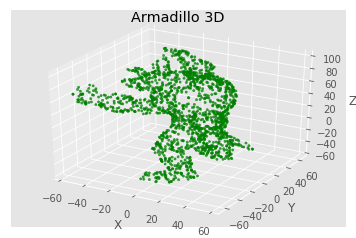

In [5]:
# Rendering the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

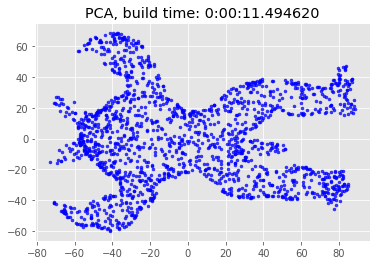

In [6]:
# Timing the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Rendering the newly transformed PCA
if not pca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('PCA, build time: ' + str(time_delta))
    ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

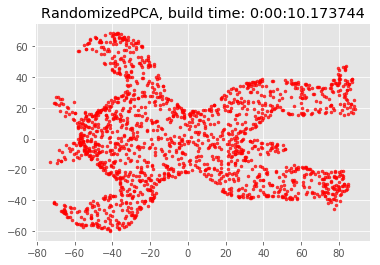

In [7]:
import warnings
warnings.filterwarnings("ignore")
# Timing the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA
if not rpca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
    ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)

In [8]:
plt.show()